In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from BXAI_ESN_pytorch import ESN as esn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## 데이터 로드

In [ ]:
df = np.loadtxt("MackeyGlass_t17.txt")
print(df.shape)

(10000,)


## gd 학습을 사용

In [ ]:
# esn()안이 hyper parameters로 n_readout: readout수, damping: 과거 데이터 소실도, spectral_radius: spectral radius
# weight_scaling : weight scale, initLen : 버릴 데이터 길이 설정, random_state = random_seed, l_a = 학습 알고리즘(gd, inverse maxtrix)
# n_feature = input의 columns수

In [ ]:
model = esn(n_readout = 1, damping=0.3, spectral_radius=None,
                 weight_scaling=1.25,initLen=0, random_state=42,inter_unit=torch.tanh, learning_rate=1e-1,zero_per = 0.9996, l_a = 'gd',n_feature = 1)

Computing spectral radius...
done.


In [ ]:
model.fit(df[:1000],df[:1000])

epoch: 0, lost:0.27388676170161347
epoch: 1, lost:0.13355869670852008
epoch: 2, lost:0.04516846482623497
epoch: 3, lost:0.005689200417535632
epoch: 4, lost:0.0056078903658642165
epoch: 5, lost:0.02759071579800592
epoch: 6, lost:0.05164132001406324
epoch: 7, lost:0.06440490554831942
epoch: 8, lost:0.0626763705011969
epoch: 9, lost:0.0500493143679698
epoch: 10, lost:0.03257250904477962
epoch: 11, lost:0.01603307908673266
epoch: 12, lost:0.004584042244498733
epoch: 13, lost:0.00011164069779261999
epoch: 14, lost:0.0021281670359044424
epoch: 15, lost:0.008238892939625483
epoch: 16, lost:0.015168424233531343
epoch: 17, lost:0.02001275408097581
epoch: 18, lost:0.021173485346640746
epoch: 19, lost:0.018626401258039247
epoch: 20, lost:0.013583915098263703
epoch: 21, lost:0.007848308219347436
epoch: 22, lost:0.0031404556464898676
epoch: 23, lost:0.0005837694364234654
epoch: 24, lost:0.0004413598260048564
epoch: 25, lost:0.002148742915359862
epoch: 26, lost:0.004615016902568479
epoch: 27, lost:0

ESN()

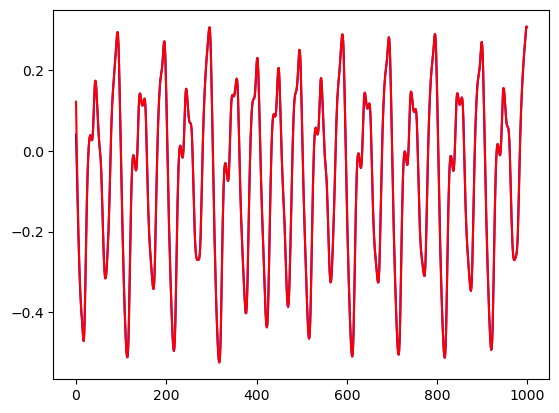

In [ ]:
y_pred = model.predict(df[:1000])
plt.plot(y_pred.cpu().detach().numpy(),'b')
plt.plot(df[:1000],'r')
plt.show()

## task 두개 진행 시

In [ ]:
dfdf = df.reshape(-1,1)
dfdf = np.concatenate([dfdf[:2000],dfdf[2000:4000]],axis= 1)
dfdf

array([[ 0.122064  , -0.36746866],
       [ 0.04719682, -0.39480925],
       [-0.01833035, -0.41580342],
       ...,
       [-0.26690859,  0.05262359],
       [-0.30151187,  0.06303535],
       [-0.33570312,  0.06655713]])

In [ ]:
#  esn 정의해서 사용 시 (n_feature : input의 column에 해당하는 수)와 ,(n_readout : output으로 사용하고자 하는 column의 수,readout 수)
# torch.save 를 사용하기 위해 esn() 정의 시  n_feature, n_readout를 사용하고자 하는 input, output의 shape에 맞게 잘 지정해 주어야 함
# model을 여러번 지정하면 Wout이 초기화 됨
model = esn(n_readout = 2,resSize=1500,zero_per = 0.9996,n_feature = 2,learning_rate = 1e-1) # default는 gd 학습법

Computing spectral radius...
done.


In [ ]:
model.fit(dfdf[:,:],dfdf[:,:])

epoch: 0, lost:0.5486829052961761
epoch: 1, lost:0.37593611655779213
epoch: 2, lost:0.2404107774134168
epoch: 3, lost:0.14162950935472823
epoch: 4, lost:0.07724325580185236
epoch: 5, lost:0.0423622893377176
epoch: 6, lost:0.029914590154490123
epoch: 7, lost:0.03206033349146938
epoch: 8, lost:0.04156005702489682
epoch: 9, lost:0.05262695177819339
epoch: 10, lost:0.06131918618253374
epoch: 11, lost:0.0655510092048931
epoch: 12, lost:0.06483690030232372
epoch: 13, lost:0.05987571943766685
epoch: 14, lost:0.05206197339063695
epoch: 15, lost:0.04300799901804019
epoch: 16, lost:0.03415072098354913
epoch: 17, lost:0.026495507513217356
epoch: 18, lost:0.020523218685751615
epoch: 19, lost:0.016251719556162558
epoch: 20, lost:0.013401669601689212
epoch: 21, lost:0.011588230099140966
epoch: 22, lost:0.010467289025154179
epoch: 23, lost:0.009803183632850525
epoch: 24, lost:0.009466953164576488
epoch: 25, lost:0.00939601695637659
epoch: 26, lost:0.009545289717774377
epoch: 27, lost:0.00984826536053

ESN()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


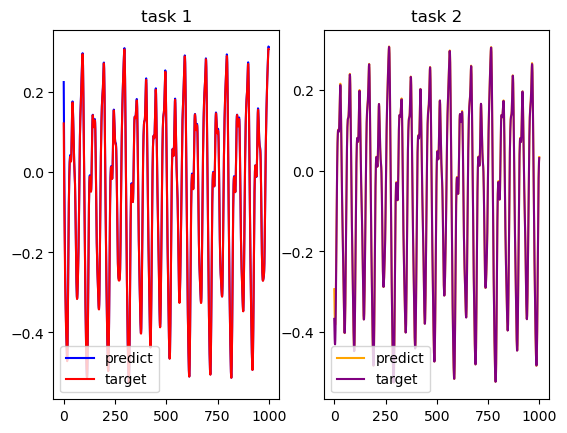

In [ ]:
# 서로 다른 task를 각 각 plot
y_pred = model.predict(dfdf[:1000,:])
# task 1
plt.subplot(1, 2, 1)
plt.title("task 1")
plt.legend()
plt.plot(y_pred[:1000,0].cpu().detach().numpy(),'b', label = 'predict')
plt.plot(dfdf[:1000,0],'r', label = "target")
plt.legend()

# task 2
plt.subplot(1, 2, 2)
plt.title("task 2")
plt.plot(y_pred[:1000,1].cpu().detach().numpy(),'orange',label = 'predict')
plt.plot(dfdf[:1000,1],'purple',label = "target")
plt.legend()
plt.show()

## torch.save ,load 사용

In [ ]:
# 모델 저장
torch.save(model.state_dict(), 'model.pth') # 사용가능

In [ ]:
model = esn(n_readout = 2,resSize=1500,zero_per = 0.9996,n_feature = 2) # default는 gd 학습법

Computing spectral radius...
done.


In [ ]:
model.load_state_dict(torch.load('model.pth')) #사용가능

<All keys matched successfully>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


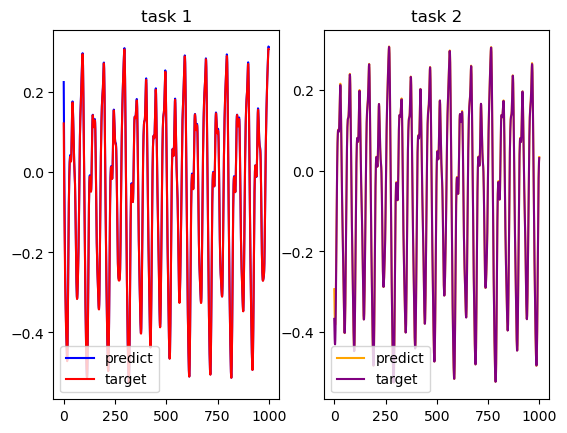

In [ ]:
# 서로 다른 task를 각 각 plot
y_pred = model.predict(dfdf[:,:])
# task 1
plt.subplot(1, 2, 1)
plt.title("task 1")
plt.legend()
plt.plot(y_pred[:1000,0].cpu().detach().numpy(),'b', label = 'predict')
plt.plot(dfdf[:1000,0],'r', label = "target")
plt.legend()

# task 2
plt.subplot(1, 2, 2)
plt.title("task 2")
plt.plot(y_pred[:1000,1].cpu().detach().numpy(),'orange',label = 'predict')
plt.plot(dfdf[:1000,1],'purple',label = "target")
plt.legend()
plt.show()

## inverse_matrix 사용

In [ ]:
model = esn(n_readout = 1,resSize=1000,zero_per = 0,l_a = "inverse_matrix")

Computing spectral radius...
done.


In [ ]:
model.fit(df[:1000],df[:1000])

ESN()

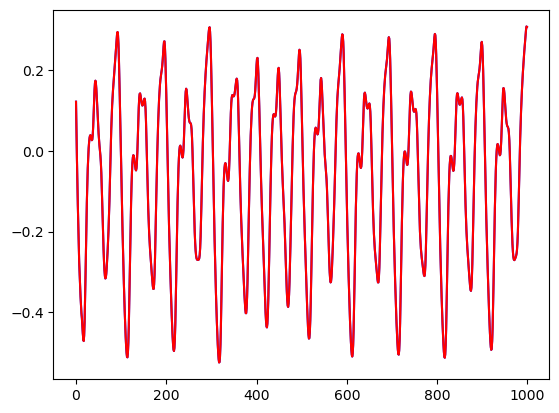

In [ ]:
y_pred = model.predict(input = df[:1000])
plt.plot(y_pred.cpu().detach().numpy(),'b')
plt.plot(df[:1000],'r')
plt.show()

## generativ mode로 future predict

In [ ]:
model = esn(n_readout = 1,resSize=1000,zero_per = 0,l_a = "inverse_matrix")

Computing spectral radius...
done.


In [ ]:
model.future_fit(df[:1000],df[:1000])

ESN()

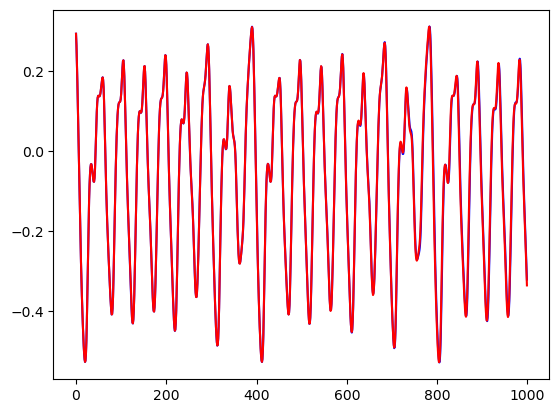

In [ ]:
y_pred = model.future_predict(1000)
plt.plot(y_pred.cpu().detach().numpy(),'b')
plt.plot(df[1000:2000],'r')
plt.show()